In [1]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

import os
from os import listdir
import gdown
from zipfile import ZipFile
import pickle
import cv2
from os import listdir

In [162]:
# load models
orignal_RF = pickle.load(open('Original_strawberry_rf','rb'))
combined_RF = pickle.load(open('combined_strawberry_LSGANxSRGAN','rb'))
standAlone_RF = pickle.load(open('Enhanced_strawberry_WGAN_rf','rb'))

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def get_results(model, test_set, label_set, model_description):
    
    print(model_description)
    
    y_pred = model.predict(test_set)
    # Calculate the accuracy of the classifier
    y_pred = np.where(y_pred[:len(test_set)] >= 0.5, 1, 0)
    
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate the confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Set the font scale
    sns.set(font_scale=2.0)

    # Create the figure and axes objects
    fig, ax = plt.subplots(figsize=(2, 2), dpi=300)

    # Create the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)

    # Set the title and axis labels
    ax.set_title('strawberry', fontsize=15)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    # Save the figure and show the plot
    plt.savefig('strawberry WGAN.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print the precision, recall, f1-score, and confusion matrix.
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Accuracy:", accuracy * 100)
    print("Confusion matrix:\n", cm)



In [164]:
def convert_to_2D(set_shape):
    num_images, height, width, channels = set_shape.shape
    converted_shape = np.reshape(set_shape, (num_images, height * width * channels))
    return converted_shape

def convert_to_1D(set_shape):
    converted_shape = set_shape.flatten()
    return converted_shape

In [165]:
from tensorflow.keras.utils import img_to_array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            img_gan = cv2.resize(image, (32,32))
            return img_to_array(img_gan)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [166]:
def extract_plant_imgs(directory_root):
    image_list, label_list = [], []
    try:
        print("[INFO] Loading images ...")
        root_dir = listdir(directory_root)
        #print(root_dir)
        for plant_folder in root_dir :
            # remove .DS_Store from list
            if plant_folder == ".DS_Store" :
                root_dir.remove(directory)


        for plant_folder in root_dir :
    #         print("on plant folder")
            plant_image_list = listdir(f"{directory_root}/{plant_folder}")



            for single_image in plant_image_list :

    #             print("in plant folder")
                if single_image == ".DS_Store" :
                    plant_image_list.remove(single_image)

            for image in plant_image_list[:1000]:
    #             print("getting img path")
                image_directory = f"{directory_root}/{plant_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".png") == True or image_directory.endswith(".PNG") == True:
    #                 print("checking if img correct format")
                    gan_img = convert_image_to_array(image_directory)
                    image_list.append(gan_img)
                    label_list.append(plant_folder)

        print("[INFO] Image loading completed")
        return image_list, label_list
    except Exception as e:
        print(f"Error : {e}")

In [167]:
orignal_data = 'Orignal_strawberry'

orignal_image_list , orignal_label_list = extract_plant_imgs(orignal_data)

[INFO] Loading images ...
[INFO] Image loading completed


In [168]:
new_image_list = np.array(orignal_image_list, dtype = np.float16) / 255.0
print(new_image_list.shape)

(2000, 32, 32, 3)


In [169]:
from sklearn.preprocessing import LabelBinarizer
label_gen = LabelBinarizer()
image_labels = label_gen.fit_transform(orignal_label_list)
pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
n_classes = len(label_gen.classes_)
print(n_classes)
print(image_labels)

2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [170]:
from sklearn.model_selection import train_test_split
print("making the training and testing split with 30% of the dataset as testing set")
x_train, x_test, y_train, y_test = train_test_split(new_image_list, image_labels, test_size=0.3, shuffle=True,random_state = 42) 
print(x_train.shape)
print(x_test.shape)

making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)


In [171]:
x_test_2D = convert_to_2D(x_test)
y_test_1D = convert_to_1D(y_test)

Original  model results


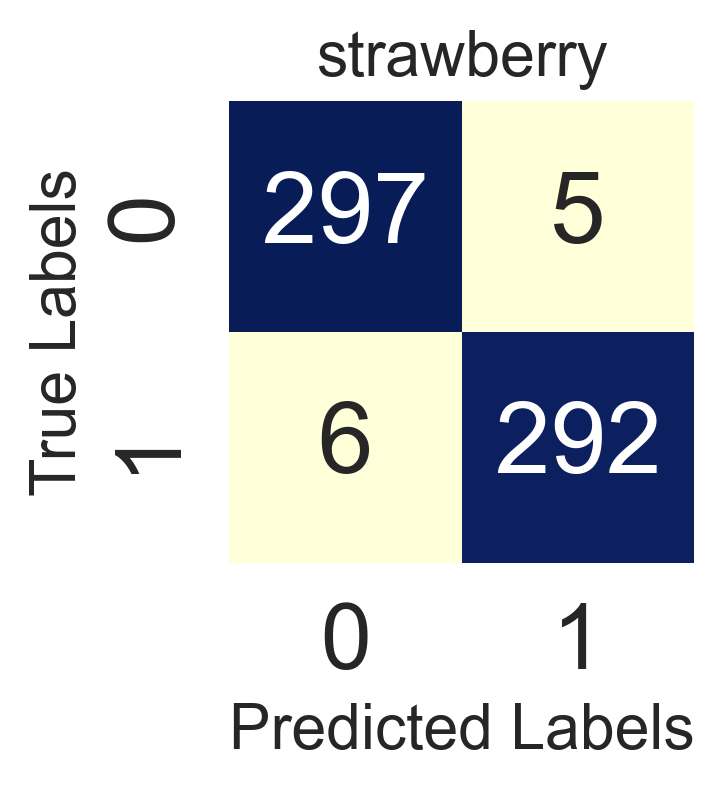

Precision: 0.9816815014834817
Recall: 0.9816547402106761
F1-score: 0.9816653934300993
Accuracy: 98.16666666666667
Confusion matrix:
 [[297   5]
 [  6 292]]


In [59]:
model_desc_original = 'Original  model results'

get_results(orignal_RF, x_test_2D, y_test, model_desc_original)

Combined  model results


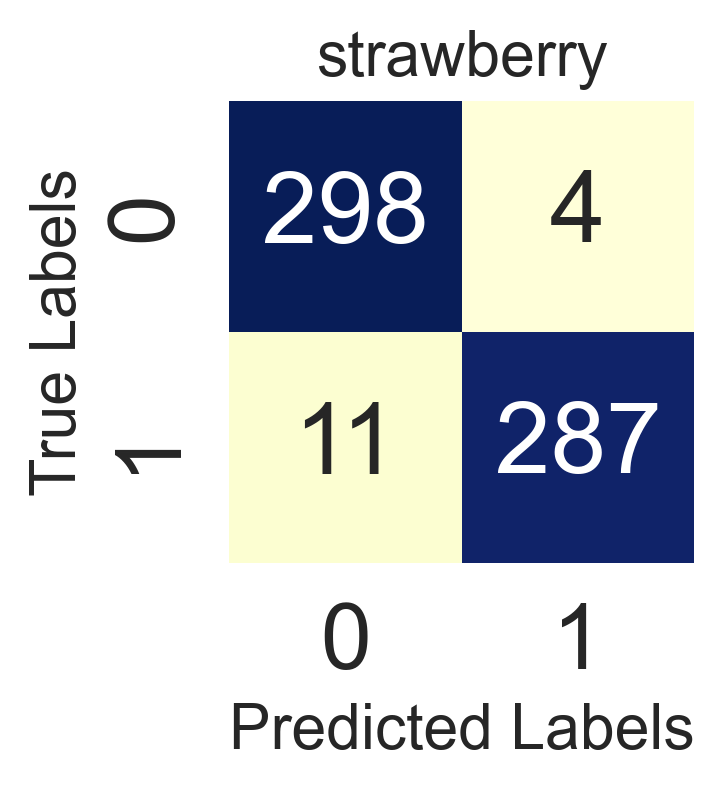

Precision: 0.9753277950155139
Recall: 0.9749211076047825
F1-score: 0.9749915943970058
Accuracy: 97.5
Confusion matrix:
 [[298   4]
 [ 11 287]]


In [56]:
model_desc_combined = 'Combined  model results'

get_results(combined_RF, x_test_2D, y_test, model_desc_combined)

standalone model results


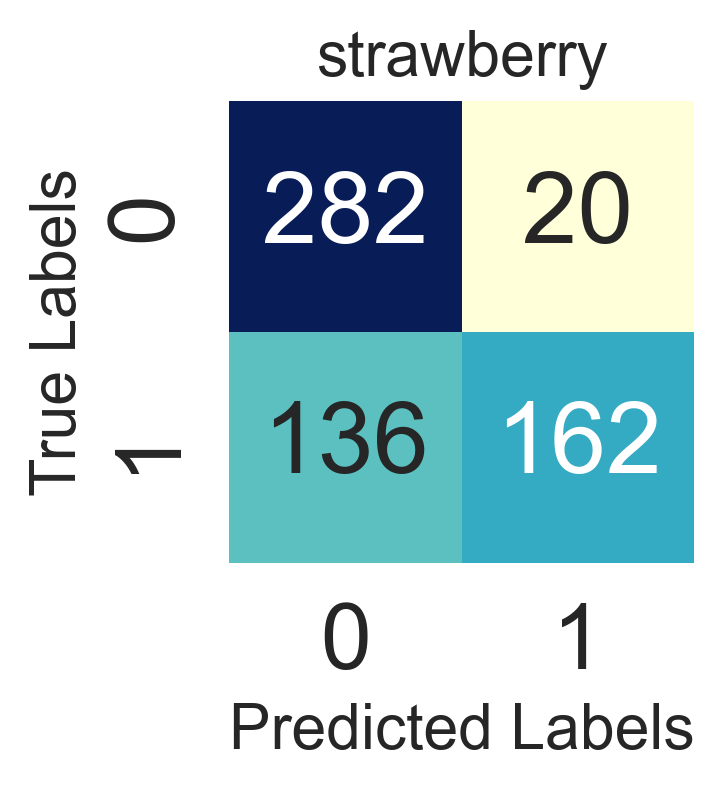

Precision: 0.7823755192176245
Recall: 0.7386994977554557
F1-score: 0.7291666666666665
Accuracy: 74.0
Confusion matrix:
 [[282  20]
 [136 162]]


In [172]:
model_desc_standAlone = 'standalone model results'

get_results(standAlone_RF, x_test_2D, y_test, model_desc_standAlone)